Working with ML first implimentation


In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("placement.csv")

In [3]:
df.head()


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.tail()


,Unnamed: 0,cgpa,iq,placement
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1
99,99,6.2,113.0,1


In [5]:
df.shape

(100, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


#step i gonna do 
1.preprocessing + EDA+Feature slection
2.extract input and output cols
3.scale values
4.train the model
5.evluate the model/model selection
6.deploy model

In [7]:
df=df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


here i removed the unnamed column because i don't want it 

In [10]:
import matplotlib.pyplot as plt

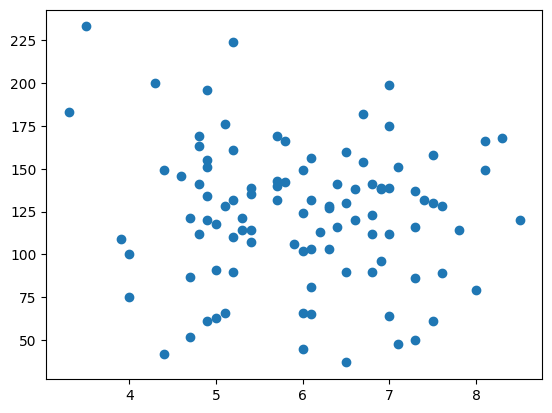

In [11]:
plt.scatter(df['cgpa'],df['iq'])

now i want to show how many of them got the pacement so,


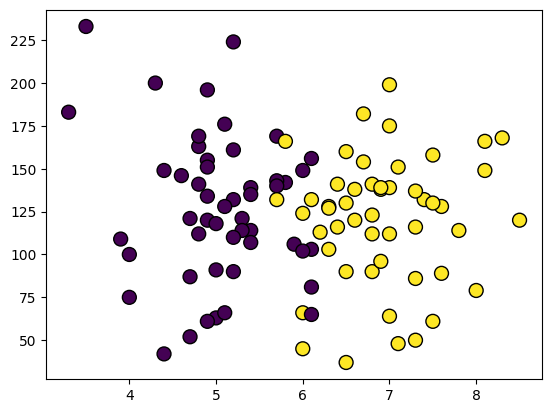

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'],cmap='viridis',s=100,edgecolor='k')

yellow ones got the placement and purple one won't

now we store the input and output


In [13]:
x=df.iloc[:,0:1] 
y=df.iloc[:,-1] 

In [14]:
x

,cgpa
0,6.8
1,5.9
2,5.3
3,7.4
4,5.8
...,...
95,4.3
96,4.4
97,6.7
98,6.3


In [15]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [16]:
y.shape

(100,)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
x_train

,cgpa
89,4.9
60,6.9
16,5.2
95,4.3
10,6.0
...,...
64,7.0
27,6.0
75,4.8
53,8.3


In [20]:
y_train

89    0
60    1
16    0
95    0
10    1
     ..
64    1
27    1
75    0
53    1
6     0
Name: placement, Length: 80, dtype: int64

In [21]:
x_test

,cgpa
96,4.4
77,7.3
13,6.4
98,6.3
39,4.6
78,6.1
87,5.7
51,4.8
46,5.3
4,5.8


In [22]:
y_test


96    0
77    1
13    1
98    1
39    0
78    0
87    1
51    0
46    0
4     0
79    1
5     1
91    1
30    1
56    0
92    0
44    1
40    0
93    1
67    0
Name: placement, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()

In [26]:
x_train=scaler.fit_transform(x_train)

In [27]:
x_train

array([[-0.92352643],
       [ 0.79067576],
       [-0.6663961 ],
       [-1.43778709],
       [ 0.01928477],
       [ 0.79067576],
       [-1.00923654],
       [ 0.53354543],
       [ 0.44783532],
       [-0.49497588],
       [-1.00923654],
       [-0.75210621],
       [-2.29488819],
       [ 1.1335162 ],
       [-1.09494665],
       [-0.49497588],
       [ 0.44783532],
       [ 0.44783532],
       [ 1.1335162 ],
       [-0.92352643],
       [-1.09494665],
       [ 0.01928477],
       [ 0.10499488],
       [ 0.61925554],
       [-0.92352643],
       [ 0.79067576],
       [ 0.10499488],
       [ 0.36212521],
       [-0.92352643],
       [-1.78062753],
       [ 1.73348697],
       [ 1.81919708],
       [-0.6663961 ],
       [-0.75210621],
       [-0.6663961 ],
       [-2.12346797],
       [ 0.10499488],
       [-0.92352643],
       [-1.09494665],
       [ 1.21922631],
       [-0.49497588],
       [ 0.2764151 ],
       [-0.23784555],
       [-0.06642533],
       [ 0.87638587],
       [ 1

In [28]:
x_test=scaler.transform(x_test)

In [29]:
x_test

array([[-1.35207698],
       [ 1.1335162 ],
       [ 0.36212521],
       [ 0.2764151 ],
       [-1.18065676],
       [ 0.10499488],
       [-0.23784555],
       [-1.00923654],
       [-0.58068599],
       [-0.15213544],
       [ 0.44783532],
       [ 0.96209598],
       [ 1.30493642],
       [ 1.39064653],
       [ 0.10499488],
       [-0.6663961 ],
       [ 1.30493642],
       [-0.92352643],
       [ 0.70496565],
       [-0.83781632]])

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf=LogisticRegression()

In [32]:
clf.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred=clf.predict(x_test)

In [34]:
y_test


96    0
77    1
13    1
98    1
39    0
78    0
87    1
51    0
46    0
4     0
79    1
5     1
91    1
30    1
56    0
92    0
44    1
40    0
93    1
67    0
Name: placement, dtype: int64

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred)

0.85

here our accuracy is 85%


In [40]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

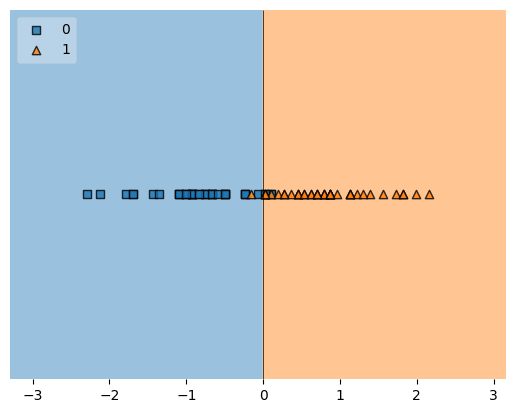

In [41]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

this is the decision boundary